<a href="https://colab.research.google.com/github/ilEnzio/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [3]:
##### Begin Working Here #####
import pandas as pd

In [9]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 100)

In [12]:
df_housing = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df_housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [14]:
# look at the "BedroomABvGr" column.
df_housing["BedroomAbvGr"]

0       3
1       3
2       3
3       3
4       4
       ..
1455    3
1456    3
1457    4
1458    2
1459    3
Name: BedroomAbvGr, Length: 1460, dtype: int64

In [16]:
# look at "LotFrontage" column
df_housing["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [20]:
#order the output by the count(magnitude?) of unique values
df_housing["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [22]:
# keyword argument dropna - determine whether to output counts of NaN

df_housing["LotFrontage"].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

In [23]:
import numpy as np
# datatyp of NaN? float! (which kinda implies there's a number that represents NaN lol)
type(np.NaN)

float

In [24]:
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
# reassign a value in the dataframe to NaN
df_housing['Id'][0] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
# changing the first value of a column affects the way Pandas DataFrame handles values of the entire column.  It infers
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
# reassign the [0][1] to str ?
df_housing["Id"][1] = "?"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,?,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
#get inferred datatype for each feature
df_housing.dtypes

Id                object
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [32]:
df_housing.isnull().sum()

Id                  1
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [34]:
# create a another df with specific column headers
# passing a list to the df...because " Can be thought of as a dict-like container for Series object"
smaller_df = df_housing[["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "SalePrice"]].copy() 
smaller_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


In [39]:
smaller_df.dtypes

TotalBsmtSF    int64
1stFlrSF       int64
2ndFlrSF       int64
SalePrice      int64
dtype: object

In [41]:
#make a new feature - TotalSquareFootage" 
smaller_df["TotalSquareFootage"] = smaller_df['TotalBsmtSF'] + smaller_df['1stFlrSF'] + smaller_df["2ndFlrSF"]

smaller_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [42]:
# make a new feature - PricePerSqFt 
# divide the price by the sq feet
smaller_df['price_per_square_ft'] = smaller_df['SalePrice']/smaller_df['TotalSquareFootage']

smaller_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,price_per_square_ft
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [43]:
# dot syntax to access a feature
smaller_df.TotalBsmtSF

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

In [44]:
# bracket syntax to access a feature
smaller_df['TotalBsmtSF']

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

In [45]:
# another way to load a dataset into the notebook runtime
# using a bash command
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-07-07 22:18:09--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 52.42.46.127, 54.148.162.195, 54.149.64.5, ...
Connecting to resources.lendingclub.com (resources.lendingclub.com)|52.42.46.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [     <=>            ]  22.21M  1.82MB/s    in 13s     

2020-07-07 22:18:23 (1.72 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23289953]



In [46]:
# unzip the file using Bash
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [47]:
# look at head and tail with shell commands
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [48]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","2769.48","2769.48","3793.65","3793.65","2830.52","963.13","0.0","0.0","0.0","Jun-2020","190.21","Jul-2020","Jun-2020","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [54]:
df_loan_stats = pd.read_csv("LoanStats_2018Q4.csv", header=1)

df_loan_stats.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,18000.0,18000.0,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0.0,Apr-2014,0.0,NaN,NaN,15.0,0.0,16147.0,35.2%,21.0,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0.0,...,4.0,11.0,15.0,6.0,15.0,0.0,0.0,0.0,4.0,100.0,12.5,0.0,0.0,60900.0,28062.0,35800.0,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,18500.0,18500.0,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1.0,May-2009,0.0,7.0,NaN,19.0,0.0,19000.0,62.1%,38.0,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0.0,...,28.0,5.0,10.0,5.0,19.0,0.0,0.0,0.0,0.0,97.3,66.7,0.0,0.0,131337.0,81660.0,22900.0,100737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32000.0,32000.0,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0.0,Oct-2000,0.0,24.0,NaN,18.0,0.0,14833.0,43%,32.0,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0.0,...,15.0,13.0,16.0,11.0,18.0,0.0,0.0,0.0,3.0,77.4,12.5,0.0,0.0,94609.0,73873.0,26800.0,60109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599.0,19.1%,13.0,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0.0,...,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,13000.0,13000.0,13000.0,36 months,23.40%,505.95,E,E1,Sale Represe

In [91]:
# try to skip rows to fix the header and tail problem
df_loan_stats = pd.read_csv("LoanStats_2018Q4.csv", skiprows=[0], skipfooter=2)
df_loan_stats.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,...,4,11,15,6,15,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,...,28,5,10,5,19,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,...,15,13,16,11,18,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,...,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,NaN,14,0,52013,83.1%,20,w,8968.74,8968.74,7057.950000,7057.95,4031.26,3026.

In [94]:
# address the tail problem df_loan_stats.tail()
df_loan_stats.tail()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,1025.67,521.41,0.0,0.0,0.0,Dec-2018,797.53,NaN,Nov-2018,0,...,3,9,19,5,12,0.0,0,0,7,96.4,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,4999.38,4999.38,6926.86,6926.86,5000.62,1926.24,0.0,0.0,0.0,Jun-2020,346.76,Jul-2020,Jun-2020,0,...,1,8,11,5,11,0.0,0,0,1,73.3,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2472.76,2472.76,3392.83,3392.83,2527.24,865.59,0.0,0.0,0.0,Jun-2020,169.83,Jul-2020,Jun-2020,0,...,6,6,7,3,9,0.0,0,0,3,92.9,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,4853.58,4732.24,6538.24,6374.78,5146.42,1391.82,0.0,0.0,0.0,Jun-2020,327.68,Jul-2020,Jun-2020,0,...,3,14,22,4,15,0.0,0,0,3,92.0,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5068.90,5068.90,7112.21,7112.21,4931.10,2181.11,0.0,0.0,0.0,Jun-2020,356.08,Jul-2020,Jun-2020,0,...,22

In [102]:
df_loan_stats.isnull().sum().sort_values()

inq_fi                                             0
mo_sin_old_rev_tl_op                               0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
total_cu_tl                                        0
total_rev_hi_lim                                   0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
open_il_24m                                        0
open_il_12m                                        0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                       0
acc_now_delinq                                     0
application_type                              

In [103]:
# remove features where all the values are Null
df2 = df_loan_stats.drop(["id", "desc", "url", "member_id"], axis= 1)

df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,NaN,1,Individual,NaN,...,4,11,15,6,15,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,NaN,1,Individual,NaN,...,28,5,10,5,19,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,41.0,1,Individual,NaN,...,15,13,16,11,18,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,NaN,1,Individual,NaN,...,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,NaN,14,0,52013,83.

In [107]:
#prepare to clean up int_rate column - change it from string to float
df2["int_rate"].head(10)

0      8.81%
1     12.98%
2     14.47%
3     17.97%
4     23.40%
5     26.31%
6     19.92%
7     23.40%
8     23.40%
9     11.80%
Name: int_rate, dtype: object

In [134]:
# create a function to remove the white spacefrom each element and then remove the "%"
def int_rate_to_float(int_rate):
    return float(int_rate.strip().strip("%"))

# int_rate_to_float(df2["int_rate"][0])
float_int_rate = []

# for loop version
for x in df2["int_rate"]:
  float_int_rate.append(int_rate_to_float(x))
  #I would have to change float_int_rate to series in the df with [] index

# apply version, adds column to end 
df2["test_feature"] = df2["int_rate"].apply(int_rate_to_float)


# comprehension version , should appear at end 
df2['compre_test'] = [int_rate_to_float(x) for x in df2["int_rate"]]
# print(float_int_rate)


df2.head()  # yaaaataaa!!!

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,test_feature,compre_test
0,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,NaN,1,Individual,NaN,...,15,6,15,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81,8.81
1,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,NaN,1,Individual,NaN,...,10,5,19,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98
2,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,41.0,1,Individual,NaN,...,16,11,18,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47
3,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,NaN,1,Individual,NaN,...,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97
4,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,other,Other,191xx,PA,39.73,0,May-20

In [136]:
# prepare clean up employment feature
df2["emp_title"].value_counts(dropna=False).head(20)


NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [137]:
# how many unique values?
df2["emp_title"].nunique()

43892

In [139]:
# how often is it null?
df2["emp_title"].isnull().sum()

20947

In [140]:
# examples of problems within the feature 
examples = ["owner", "Supervisor", " Project Manager", np.NaN]

In [143]:
#write a function that cleans up the use cases
def clean_up_employment_feature(item):
  if isinstance(item, str):
  # this removes the white space and implements "title" casing
    return item.strip().title()
  else: 
    return "Unknown"
    
# list comprehesion to test cleaning function 
exp_test = [clean_up_employment_feature(x) for x in examples]
print(exp_test)

['Owner', 'Supervisor', 'Project Manager', 'Unknown']


In [144]:
# use our function in a comprehension to clean the series; 
# assign series it returns to the original series
df2["emp_title"] = [clean_up_employment_feature(x) for x in df2["emp_title"]]

df2["emp_title"].value_counts().head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [145]:
df2['emp_title'].nunique()


34902

In [148]:
# time to double check the Nan counts
df2['emp_title'].isnull().sum()

0

In [149]:
#date stuff print out the columns that end with "_d"
[col for col in df2 if col.endswith("_d")]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [151]:
# pick one to clean
df2["issue_d"].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [152]:
df2["issue_d"].value_counts()

Oct-2018    46305
Nov-2018    41973
Dec-2018    40134
Name: issue_d, dtype: int64

In [153]:
# let Pandas detect the format and translate to a datetime object
# using the .to_datetime Pandas built in??  
# the return type of this function depends on the input.  for us a Series will 
# return a Series
df2["issue_d"] = pd.to_datetime(df2["issue_d"], infer_datetime_format = True)

In [155]:
df2["issue_d"].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [156]:
# datetime objects have .dt accesor to properties
df2["issue_d"].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128407    2018
128408    2018
128409    2018
128410    2018
128411    2018
Name: issue_d, Length: 128412, dtype: int64

In [157]:
# use the .dt to add new features
df2["issue_year"] = df2["issue_d"].dt.year
df2["issue_month"] = df2["issue_d"].dt.month

In [159]:
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,test_feature,compre_test,issue_year,issue_month
0,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,2018-12-01,Charged Off,n,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,NaN,1,Individual,NaN,...,15,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81,8.81,2018,12
1,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,NaN,1,Individual,NaN,...,19,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98,2018,12
2,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,2018-12-01,Current,n,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,41.0,1,Individual,NaN,...,18,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,2018,12
3,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,NaN,1,Individual,NaN,...,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97,2018,12
4,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,2018-12-01,Current,n,other,Other,191xx,PA,39.

In [160]:
# convert the earliest column to datetime objects
df2["earliest_cr_line"] = pd.to_datetime(df2["earliest_cr_line"], infer_datetime_format=True
                                         )

In [161]:
df2["earliest_cr_line"].head()

0   2014-04-01
1   2009-05-01
2   2000-10-01
3   2011-04-01
4   2007-05-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [166]:
# test math operators on datetime objects
(df2['issue_d'] - df2["earliest_cr_line"]).dt.days /365


0          4.671233
1          9.591781
2         18.178082
3          7.673973
4         11.594521
            ...    
128407    33.189041
128408    36.276712
128409    12.342466
128410    10.005479
128411    12.090411
Length: 128412, dtype: float64

In [167]:
#create new feature 
df2["credit_length"] = (df2['issue_d'] - df2["earliest_cr_line"]).dt.days /365

df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,test_feature,compre_test,issue_year,issue_month,credit_length
0,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,2018-12-01,Charged Off,n,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,2014-04-01,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,NaN,1,Individual,NaN,...,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81,8.81,2018,12,4.671233
1,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,554xx,MN,27.86,1,2009-05-01,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,NaN,1,Individual,NaN,...,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98,2018,12,9.591781
2,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,2018-12-01,Current,n,home_improvement,Home improvement,152xx,PA,26.11,0,2000-10-01,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,41.0,1,Individual,NaN,...,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,2018,12,18.178082
3,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,NaN,1,Individual,NaN,...,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97,2018,12,7.673973
4,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,2018-1

In [193]:
# find the oldest credit history using describe
df2["credit_length"].describe()


count    128412.000000
mean         16.054497
std           7.908317
min           3.084932
25%          11.093151
50%          14.427397
75%          19.846575
max          68.961644
Name: credit_length, dtype: float64

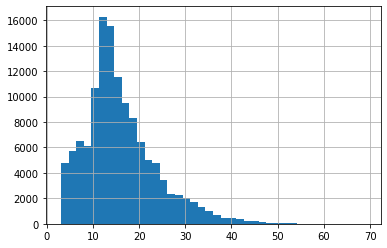

In [194]:
# plot it with hist
df2["credit_length"].hist(bins=40);

Convert the term column from string to integer.

Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

Make last_pymnt_d_month and last_pymnt_d_year columns.

In [195]:
# look at the term column
df2["term"].head()

0     36 months
1     60 months
2     60 months
3     36 months
4     36 months
Name: term, dtype: object

In [196]:
df2["term"].tail()

128407     36 months
128408     36 months
128409     36 months
128410     36 months
128411     36 months
Name: term, dtype: object

In [198]:
df2["term"].value_counts()

 36 months    88179
 60 months    40233
Name: term, dtype: int64

In [199]:
df2["term"].isnull().sum()

0

In [205]:
# after looking at raw data and some attributes, looks like I have to strip of white space
# strip of "months"; then cast to int

def term_str_to_int(item):
  return int(item.strip().strip("months"))

# comprehension to return and assign the new series to the original index
df2["term"] = [term_str_to_int(x) for x in df2["term"]]

df2["term"].head()

0    36
1    60
2    60
3    36
4    36
Name: term, dtype: int64

In [206]:
#Make a column named loan_status_is_great. 
#It should contain the integer 1 if loan_status is "Current" or "Fully Paid."
# Else it should contain the integer 0.

# first check out loan_status
df2["loan_status"].value_counts()

Current               84446
Fully Paid            31748
Charged Off            9759
Late (31-120 days)     1277
In Grace Period         889
Late (16-30 days)       277
Default                  16
Name: loan_status, dtype: int64

In [207]:
df2["loan_status"].isnull().sum()

0

In [210]:
# just to be sure 
df2["loan_status"].nunique()

7

In [220]:
def evaluate_loan_status(status):
  if status == "Current" or status == "Fully Paid":
    return 1
  else:
    return 0

test_status = "Fully Paid"
result = evaluate_loan_status(test_status)
print(result)


1


In [221]:
# create comprehension to create and assign new feature "loan_status_is_great"
df2["loan_status_is_great"] = [evaluate_loan_status(x) for x in df2["loan_status"]]

df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,test_feature,compre_test,issue_year,issue_month,credit_length,loan_status_is_great
0,18000,18000,18000.0,36,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,2018-12-01,Charged Off,n,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,2014-04-01,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,Oct-2019,570.81,NaN,May-2020,0,NaN,1,Individual,NaN,...,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81,8.81,2018,12,4.671233,0
1,18500,18500,18500.0,60,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,554xx,MN,27.86,1,2009-05-01,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,Jun-2020,420.75,Jul-2020,Jun-2020,0,NaN,1,Individual,NaN,...,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98,2018,12,9.591781,1
2,32000,32000,32000.0,60,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,2018-12-01,Current,n,home_improvement,Home improvement,152xx,PA,26.11,0,2000-10-01,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,May-2020,0.00,Jul-2020,Jun-2020,0,41.0,1,Individual,NaN,...,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,2018,12,18.178082,1
3,5000,5000,5000.0,36,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,Oct-2019,4741.09,NaN,Jun-2020,0,NaN,1,Individual,NaN,...,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97,2018,12,7.673973,1
4,13000,13000,13000.0,36,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,2018-12-01,Current,n,other,Other,191xx,PA,39.

In [224]:
# create a temp df just to better check the new feature
temp_df = df2[["loan_status", "loan_status_is_great", "credit_length"]].copy()

temp_df.head(20)

,loan_status,loan_status_is_great,credit_length
0,Charged Off,0,4.671233
1,Current,1,9.591781
2,Current,1,18.178082
3,Fully Paid,1,7.673973
4,Current,1,11.594521
5,Current,1,8.254795
6,Current,1,13.676712
7,Charged Off,0,15.260274
8,Charged Off,0,12.257534
9,Current,1,13.342466


In [226]:
temp_df.tail()

,loan_status,loan_status_is_great,credit_length
128407,Charged Off,0,33.189041
128408,Current,1,36.276712
128409,Current,1,12.342466
128410,Current,1,10.005479
128411,Current,1,12.090411


In [229]:
#Make last_pymnt_d_month and last_pymnt_d_year columns.
df2['last_pymnt_d'].value_counts(dropna=False)

Jun-2020    84169
Jul-2019     3146
Sep-2019     2755
Oct-2019     2722
Aug-2019     2716
Dec-2019     2713
May-2020     2621
May-2019     2547
Nov-2019     2388
Apr-2019     2356
Mar-2020     2319
Jan-2020     2304
Jun-2019     2288
Mar-2019     1984
Apr-2020     1983
Jul-2020     1944
Feb-2019     1915
Feb-2020     1789
Jan-2019     1561
Dec-2018     1054
Nov-2018      679
Oct-2018      234
NaN           159
Aug-2020       64
Sep-2020        2
Name: last_pymnt_d, dtype: int64

In [228]:
df2["last_pymnt_d"].isnull().sum()

159

In [239]:
# just want to see those NaN  out of curiosity
df_last_pay_nan = [x for x in df2["last_pymnt_d"] if isinstance(x, float) ]
len(df_last_pay_nan)
print(df_last_pay_nan)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [246]:
# convert the non-nan dates to datetime objects, ignore the nans
# create function; then test
def convert_date(date):
  if isinstance(date, float) == False:
    return pd.to_datetime(date, infer_datetime_format=True)
  else:
    return

test_date = np.NaN

print(convert_date(test_date))


None


In [247]:
# do the conversion and assign the new values
df2["last_pymnt_d"] = [convert_date(x) for x in df2["last_pymnt_d"]]



0   2019-10-01
1   2020-06-01
2   2020-05-01
3   2019-10-01
4   2020-06-01
5   2020-06-01
6   2020-06-01
7   2019-09-01
8   2019-12-01
9   2020-06-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [249]:
df2["last_pymnt_d"].head(10)

0   2019-10-01
1   2020-06-01
2   2020-05-01
3   2019-10-01
4   2020-06-01
5   2020-06-01
6   2020-06-01
7   2019-09-01
8   2019-12-01
9   2020-06-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [250]:
# make sure the nan's were not touched at this point.
df2["last_pymnt_d"].isnull().sum()

159

In [261]:
# create the new columns for year and month

df2["last_pymnt_d_month"] = df2["last_pymnt_d"].dt.month
df2["last_pymnt_d_year"] = df2["last_pymnt_d"].dt.year

df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,test_feature,compre_test,issue_year,issue_month,credit_length,loan_status_is_great,last_pymnt_d_month,last_pymnt_d_year
0,18000,18000,18000.0,36,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,2018-12-01,Charged Off,n,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,2014-04-01,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,1128.83,0.0,0.0,0.0,2019-10-01,570.81,NaN,May-2020,0,NaN,1,Individual,NaN,...,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81,8.81,2018,12,4.671233,0,10.0,2019.0
1,18500,18500,18500.0,60,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,554xx,MN,27.86,1,2009-05-01,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,3189.17,0.0,0.0,0.0,2020-06-01,420.75,Jul-2020,Jun-2020,0,NaN,1,Individual,NaN,...,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98,2018,12,9.591781,1,6.0,2020.0
2,32000,32000,32000.0,60,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,2018-12-01,Current,n,home_improvement,Home improvement,152xx,PA,26.11,0,2000-10-01,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,5264.71,0.0,0.0,0.0,2020-05-01,0.00,Jul-2020,Jun-2020,0,41.0,1,Individual,NaN,...,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,2018,12,18.178082,1,5.0,2020.0
3,5000,5000,5000.0,36,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,622.05,15.0,0.0,0.0,2019-10-01,4741.09,NaN,Jun-2020,0,NaN,1,Individual,NaN,...,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97,2018,12,7.673973,1,10.0,2019.0
4,13000,13000,13000.0,36,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,20

In [ ]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# %cd instacart_2017_05_01